#Business Understanding

In [ ]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = open('/content/drive/MyDrive/Machine learnig/Machine learnig temporada 2/Base_clientes_Monopoly.xlsx','rb')
data = pd.read_excel(df,sheet_name='Transición de Negocio')
data


,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.565,1.566,1.567,1.568,1.569,1.570,1.571,1.572,1.573,574
0,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,NaN
1,1,160,M,13,43,NaN,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,NaN
2,2,160,H,13,46,143640,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,NaN
3,3,170,H,13,45,929106,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,NaN
4,4,151,H,13,46,172447,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51120,51120,160,H,13,51,364978,57,1,1,1,...,300000,0,478320,0,478320,12668,0,R,0,NaN
51121,51121,170,H,13,51,625376,39,1,0,0,...,166098,0,166098,0,0,572363,0,R,0,NaN
51122,51122,160,H,13,47,806220,153,1,1,0,...,18891,0,9652,0,9652,16241,0,R,0,NaN
51123,51123,160,M,13,47,NaN,11,1,0,0,...,26528,0,24638,0,24638,84982,0,R,0,NaN


In [ ]:
df = open('/content/drive/MyDrive/Machine learnig/Machine learnig temporada 2/Base_clientes_Monopoly.xlsx','rb')
data2 = pd.read_excel(df,sheet_name='Descripción')
data2.T

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Variable,CORRELATIVO,Region,Renta,Sexo,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,...,TxsCCPC_T12,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12
Transformación,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,...,Suma,Suma,Suma,Suma,Suma,Suma,Suma,Promedio,Promedio,Promedio
Valor,518050,13,NaN,M,151,39,0,78,NaN,0,...,0,0,0,0,5,9,0,-12178,0,0
Descripcion,Identificador cliente,Region de Residencia,Renta del cliente,Sexo,Subsegmento,Edad,Indicador de Tenecia de TC adicionales,Antigüedad del cliente (meses),Indicador del cambio de clave secreta de la ta...,Indicador de Credito de Consumo,...,Numero de transacciones en compras en cuotas p...,Numero de transacciones en compras internacion...,Numero de transacciones en compras nacionales ...,Numero de transacciones en avances en cuotas p...,Numero de transacciones en avances realizados ...,Numero de transacciones en compras realizados ...,Numero de transacciones en PAT realizados por ...,Monto de deuda en la linea de compras en la TC...,Monto de deuda en la linea de avances en cuota...,Monto de deuda en la linea de compras internac...


Contexto


Los bancos son entidades que se organizan de acuerdo con leyes especiales, los cuales se dedican a trabajar con el dinero de sus clientes, por lo cual reciben y tienen depósitos hechos por las personas y empresas, además de ofrecer préstamos a sus clientes utilizando estos mismos recursos.

El banco cuenta con sus trabajadores y lo más importante, sus clientes, con los cuales vamos a trabajar. El caso es basado en un banco llamado Monopoly el cual lleva muchos años atendiendo a sus clientes en chile, el cual recientemente fue adquirido por un banco con capitales extranjeros llamado “Dormammu”, el cual ha solicitado a sus ingenieros hacer estudio sobre los clientes del banco adquirido para conocer sus comportamientos y patrones de estos y se ha extraído una base de datos de los clientes. Esta se ha compartido con la base de datos de Dormammu, y dentro de esta base de datos encontramos muestras de clientes con 12 meses de información almacenada en variables mensuales por cada uno de los distintos clientes, ya sea persona o empresa que está afiliada a este banco.

La base de datos tiene variables asociadas a información del cliente y variables mensuales, esto quiere decir que, por cada mes, el cliente no se repite y las variables asociadas se van agregando como una columna más. Por lo cual la base de datos cuenta con 574 variables y 51.124 registros.

En la base de datos nos encontramos con muchas variables distintas, las cuales nos entregan una amplia información de los clientes, pero principalmente las variables.

*   Correlativo: Esta variable nos entrega la información que identifica al cliente algo como un ID

*   Renta: Esta variable nos entrega la información de qué cantidad de dinero gana aproximadamente el cliente asociado


*   Consumo: Esta variable nos entrega la información de crédito de consumo que tenga el cliente


*   Débito: Esta variable nos indica si el cliente posee alguna tarjeta de débito


*   Ctacte: Esta variable nos indica información sobre la cuenta corriente que tiene el cliente


*   Cuentas: Esta variable nos da la información de la cantidad de cuentas que posee el cliente dentro del banco


Estas son solo alguna de las distintas variables que nos podemos encontrar, las cuales nos facilita recoger información de los clientes y permitiéndonos poder realizar algún tipo de predicción que nos ayude a mejorar el negocio








#Data understanding

Variables

Edad


In [ ]:
dft = pd.DataFrame(columns=['Edad'])
dft['Edad']=data["1.4"]
dft=dft.drop(dft.index[[0]])
dft = dft.astype(int)
dft.describe()

,Edad
count,51124.000000
mean,38.702879
std,13.302573
min,9.000000
25%,28.000000
50%,35.000000
75%,46.000000
max,104.000000


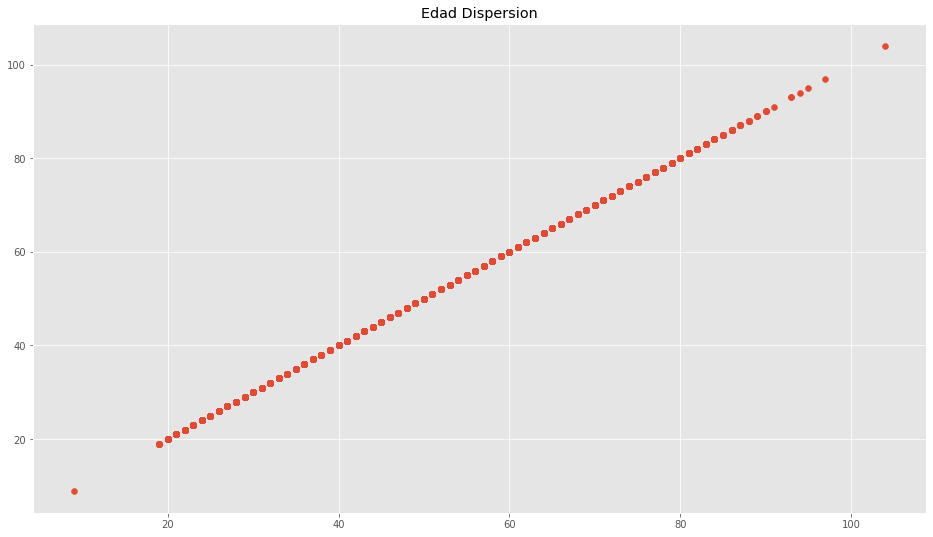

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = dft.Edad, y = dft.Edad)
ax.set_title("Edad Dispersion")
plt.show()

Al ver las edades por medio de un grafico de dispercion nos damos cuenta que forma una Recta y nos da los 2 datos atipicos de la data.

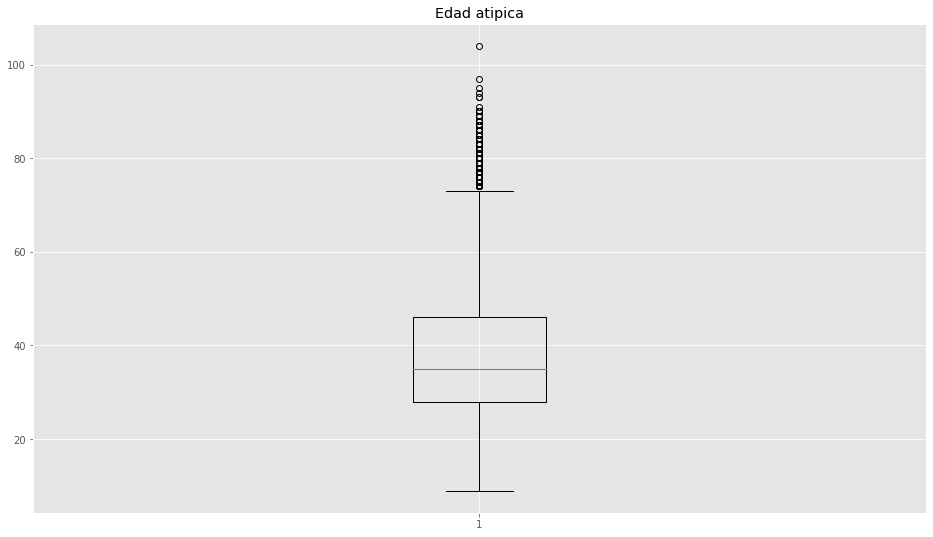

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(dft.Edad)
ax.set_title("Edad atipica")
plt.show()

Este grafico lo usamos exclusivamente para mostrar los atipicos y en donde se pueden encontrar la mayor cantidad de clientes, el primer dato atipico se encuentra bajo los 20 y el segundo datos se encuentra sobre los 100.

Tambien podemos ver que la mayor cantidad de clientes se registras entre 20 y 40 años

La edad de los clientes es bastante variable según los datos entregados por el banco Monopoly, pero se registra que el cliente con menor edad registrado en el banco tiene 9 años. La edad más común en los clientes que poseen cuenta en el banco es de 27 años y el cliente con mayor edad en el banco tiene 104 años.

Renta

In [ ]:
from sklearn.impute import KNNImputer

dft = pd.DataFrame(columns=['Renta'])
dft['Renta']=data["1.5"]
dft=dft.drop(dft.index[[0]])
knn = KNNImputer(n_neighbors=5)
neighbors = knn.fit_transform(dft)
columnas= dft.columns
dft = pd.DataFrame(neighbors, columns=columnas)
dft = dft.astype(int)
dft.describe()


,Renta
count,5.112400e+04
mean,6.630771e+05
std,3.517356e+05
min,1.000000e+00
25%,4.669655e+05
50%,6.630770e+05
75%,7.095002e+05
max,1.308933e+07


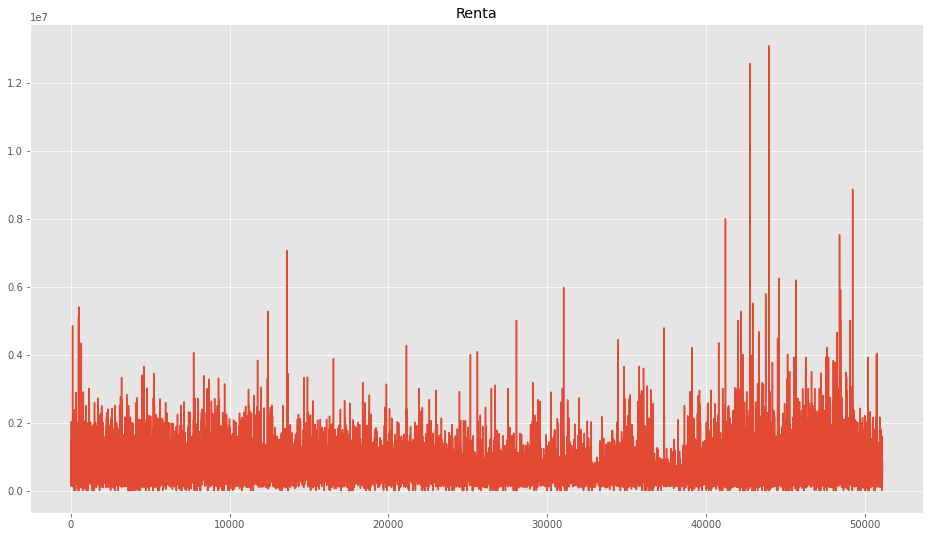

In [ ]:
fig, ax = plt.subplots()
ax.plot(dft.Renta)
ax.set_title("Renta")
plt.show()

En este grafico podemos observar la cantidad que ganan los clientes de forma mensual, se puede observar que algunos clientes sobresalen

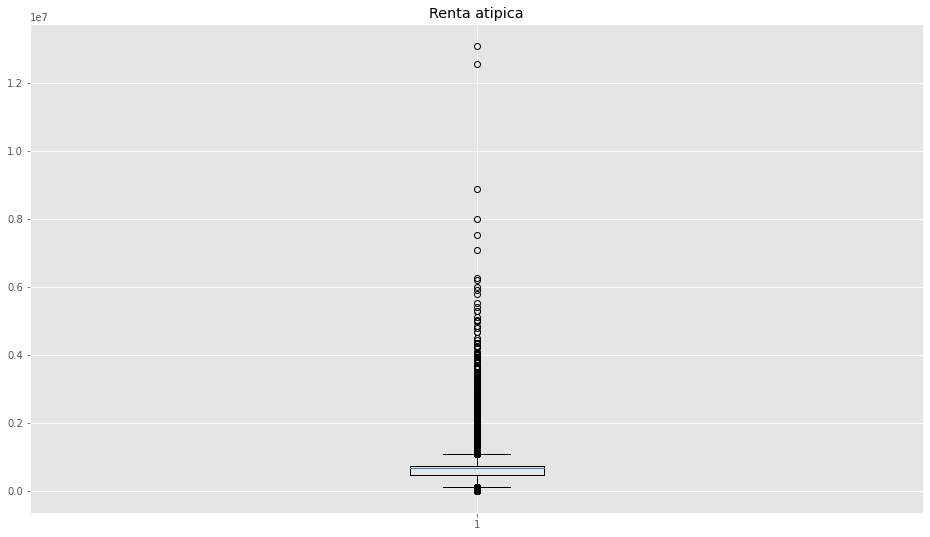

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(dft.Renta)
ax.set_title("Renta atipica")
plt.show()

Podemos observar los datos atipos de la renta en el cual se registran 2 datos atipicos que se encuentran muy lejos comparado a los demas.

La renta se refiere a la cantidad de dinero que ingresa al banco por parte del cliente, siendo la menor cantidad ingresada 1 peso, y la mayor cantidad ingresada por un cliente es de 13.089.327 pesos. También la cantidad ingresada más común en de 400.000 pesos.

Indicador de cuenta corriente


In [ ]:
dft = pd.DataFrame(columns=['Indicador_cuenta'])
dft['Indicador_cuenta']=data["1.11"]
dft=dft.drop(dft.index[[0]])
dft = dft.astype(int)
dft.describe()

,Indicador_cuenta
count,51124.000000
mean,0.925260
std,0.262974
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


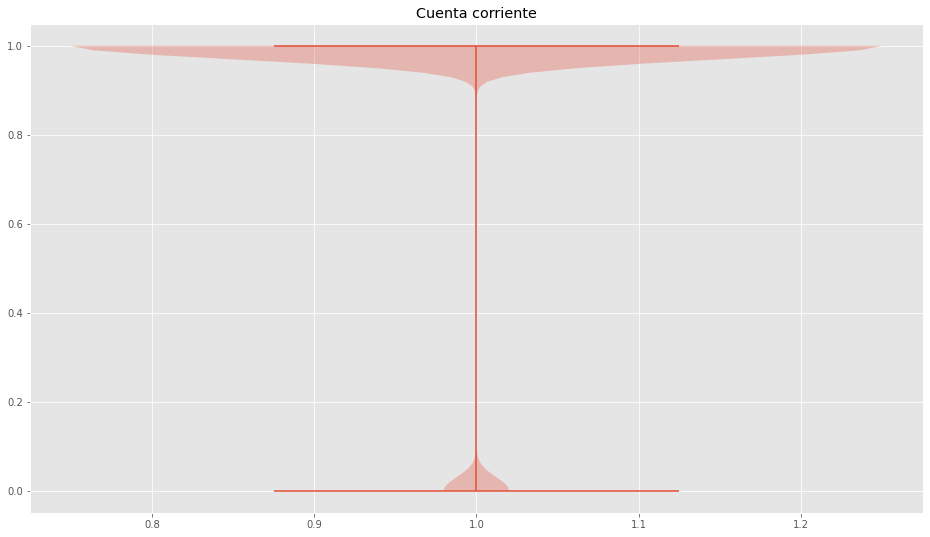

In [ ]:
fig, ax = plt.subplots()
ax.violinplot(dft.Indicador_cuenta)
ax.set_title("Cuenta corriente")
plt.show()

En el siguiente grafico podemos observar la cantidad de clientes que se encuentran registrados en el banco con cuenta corriente y sin cuenta corriente, se puede observar que la gran mayoria de los cliente si tiene cuenta corriente y que es una minima cantidad la que no tiene.

Este dato nos indica si el cliente posee una cuenta corriente en el banco, siendo 1 la existencia de una cuenta corriente por parte del cliente, y 0 siendo el valor que especifica que el cliente no posee cuenta corriente. Se puede apreciar que la gran mayoría de los clientes si poseen una cuenta corriente, llegando a la cantidad de, 47303 clientes con esta característica.

Subsegmento


In [ ]:
dft = pd.DataFrame(columns=['Subsegmento'])
dft['Subsegmento']=data["1.1"]
dft=dft.drop(dft.index[[0]])
dft = dft.astype(int)
dft.describe()

,Subsegmento
count,51124.000000
mean,182.024274
std,29.276596
min,151.000000
25%,160.000000
50%,170.000000
75%,210.000000
max,959.000000


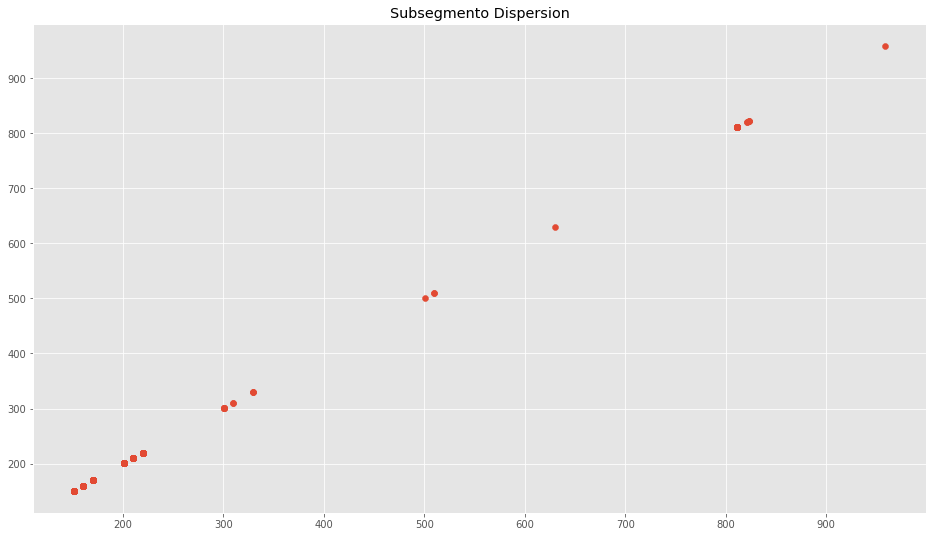

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = dft.Subsegmento, y = dft.Subsegmento)
ax.set_title("Subsegmento Dispersion")
plt.show()

Esta sección nos indica a qué agrupación del banco pertenece el cliente, siendo el subsegmento 170 el más común entre los clientes.

Pago Nacional


In [ ]:
dft = pd.DataFrame(columns=['PagoNac_T01'])
dft['PagoNac_T01']=data["1.565"]
dft=dft.drop(dft.index[[0]])
dft = dft.astype(int)
dft.describe()

,PagoNac_T01
count,5.112400e+04
mean,7.637553e+04
std,1.490256e+05
min,0.000000e+00
25%,5.000000e+03
50%,3.400150e+04
75%,9.200000e+04
max,8.697782e+06


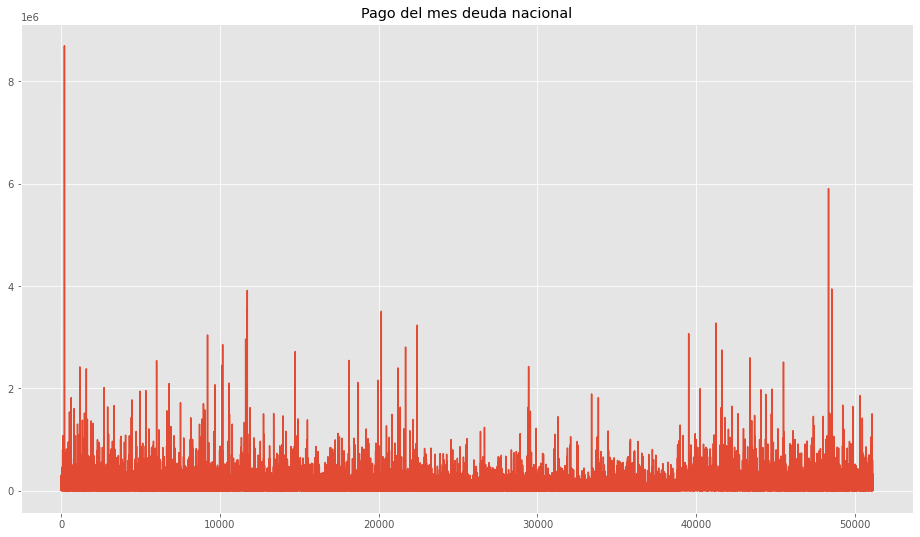

In [ ]:
fig, ax = plt.subplots()
ax.plot(dft.PagoNac_T01)
ax.set_title("Pago del mes deuda nacional")
plt.show()

El gráfico nos indica la cantidad de dinero que pagan los clientes en un mes específico base a su deuda nacional, se registra que la mayoría no paga su deuda nacional o no tiene deuda nacional

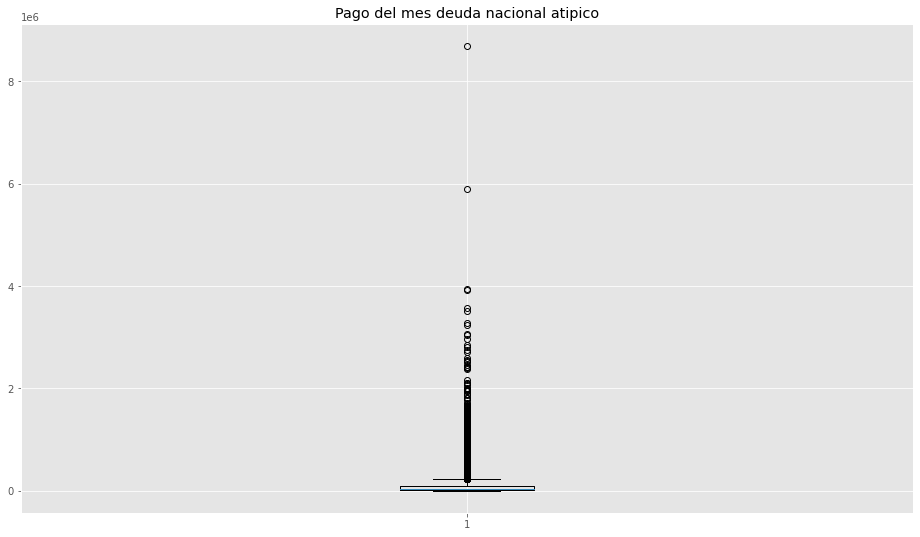

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(dft.PagoNac_T01)
ax.set_title("Pago del mes deuda nacional atipico")
plt.show()

Nos indica la suma de dinero que ha pagado el cliente en el mes específico de su deuda nacional. Por ejemplo, en el mes 1, se puede apreciar que lo más común para este mes, es que no se pague nada por parte de los clientes, siendo alrededor de 10 mil. Dejando eso de lado, el pago de los clientes para el mes 1 va desde 1 peso, hasta los 8.697.782.

Por que escogimos estos datos.

Escogimos estos datos, ya que creemos que son lo más optimó para el objetivo que queremos conseguir, el cual es si nuestro cliente puede llegar o no a solicitar un crédito hipotecario a futuro, puesto que:



*  Edad:Esta variable nos entrega la información de la edad que posee el cliente, por lo cual nos puede ayudar, porque estando dentro de un rango de edad, estos pueden estar buscando adquirir un crédito hipotecario.



*  Renta:Esta variable nos entrega la información de cuanto es él

   Sueldo que posee el cliente que está asociado al banco, el cual dependiendo  de cuanto gane el cliente se nos puede dar la idea si está dentro de su alcance poder adquirir un crédito hipotecario.



*  Indicador cuenta corriente:Esta variable nos entrega la información de que si el cliente posee o no una cuenta corriente y si es así cuanto número de cuentas este posee esta variable nos pueda dar la idea si el cliente está ahorrando o no para poder solicitar un crédito hipotecario.



*  Subsegento:Esta variable nos entrega la información de que si el cliente es nuevo, antiguo, rentable, etc. lo cual nos puede ayudar a identificar clientes dependiendo de cuál de estos está clasificado



*  Pago nacional:Esta variable nos entrega la información de los pagos mensuales del cliente, lo cual nos puede dar la idea de que si el cliente está muy endeudados es poco probable que solicite un crédito hipotecario y al contrario si este no lo está.

#Data Preparation

Creando dataframe para trabajar

In [ ]:
dft = pd.DataFrame(columns=['Edad','Renta','Indicador_cuenta','subsegmento','PagoNac_T01','PagoNac_T02','PagoNac_T03','PagoNac_T04','PagoNac_T05','Hipotecario'])
dft['Edad']=data["1.4"]
dft['Renta']=data["1.5"]
dft['Indicador_cuenta']=data["1.11"]
dft['subsegmento']=data["1.1"]
dft['PagoNac_T01']=data["1.565"]
dft['PagoNac_T02']=data["1.519"]
dft['PagoNac_T03']=data["1.473"]
dft['PagoNac_T04']=data["1.427"]
dft['PagoNac_T05']=data["1.381"]
dft['Hipotecario']=data["1.13"]
dft=dft.drop(dft.index[[0]])
dft

,Edad,Renta,Indicador_cuenta,subsegmento,PagoNac_T01,PagoNac_T02,PagoNac_T03,PagoNac_T04,PagoNac_T05,Hipotecario
1,43,NaN,1,160,33000,33000,41000,39000,50000,0
2,46,143640,1,160,300000,14000,0,200000,200000,1
3,45,929106,1,170,216676,25189,0,54138,69822,1
4,46,172447,0,151,60000,60000,60000,60000,50000,0
5,46,805250,1,170,272925,143686,220811,246171,301860,1
...,...,...,...,...,...,...,...,...,...,...
51120,51,364978,1,160,300000,50000,0,83000,0,0
51121,51,625376,1,170,166098,173162,169661,76775,159171,0
51122,47,806220,1,160,18891,14700,26700,17283,13123,0
51123,47,NaN,1,160,26528,25460,61173,18959,35158,0


In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=10)
neighbors = knn.fit_transform(dft)

columnas= dft.columns
dft_nei = pd.DataFrame(neighbors, columns=columnas)
dft_nei

,Edad,Renta,Indicador_cuenta,subsegmento,PagoNac_T01,PagoNac_T02,PagoNac_T03,PagoNac_T04,PagoNac_T05,Hipotecario
0,43.0,626214.2,1.0,160.0,33000.0,33000.0,41000.0,39000.0,50000.0,0.0
1,46.0,143640.0,1.0,160.0,300000.0,14000.0,0.0,200000.0,200000.0,1.0
2,45.0,929106.0,1.0,170.0,216676.0,25189.0,0.0,54138.0,69822.0,1.0
3,46.0,172447.0,0.0,151.0,60000.0,60000.0,60000.0,60000.0,50000.0,0.0
4,46.0,805250.0,1.0,170.0,272925.0,143686.0,220811.0,246171.0,301860.0,1.0
...,...,...,...,...,...,...,...,...,...,...
51119,51.0,364978.0,1.0,160.0,300000.0,50000.0,0.0,83000.0,0.0,0.0
51120,51.0,625376.0,1.0,170.0,166098.0,173162.0,169661.0,76775.0,159171.0,0.0
51121,47.0,806220.0,1.0,160.0,18891.0,14700.0,26700.0,17283.0,13123.0,0.0
51122,47.0,649221.2,1.0,160.0,26528.0,25460.0,61173.0,18959.0,35158.0,0.0


Nosotros decidimos usar el método de reemplazo según los vecinos en nuestro dataframe.

Decidimos esto ya que la mayoría de los valores nulos que se encuentran en nuestro dataframe son relacionados con la renta del individuo y estos datos se pueden reemplazar, porque se relacionan con la edad, si es que tiene un crédito hipotecario, su subsegmento y el monto pagado en la renta nacional, así siendo el mejor método de reemplazo que podemos utilizar.

In [ ]:
dft_nei

,Edad,Renta,Indicador_cuenta,subsegmento,PagoNac_T01,PagoNac_T02,PagoNac_T03,PagoNac_T04,PagoNac_T05,Hipotecario
0,43.0,626214.2,1.0,160.0,33000.0,33000.0,41000.0,39000.0,50000.0,0.0
1,46.0,143640.0,1.0,160.0,300000.0,14000.0,0.0,200000.0,200000.0,1.0
2,45.0,929106.0,1.0,170.0,216676.0,25189.0,0.0,54138.0,69822.0,1.0
3,46.0,172447.0,0.0,151.0,60000.0,60000.0,60000.0,60000.0,50000.0,0.0
4,46.0,805250.0,1.0,170.0,272925.0,143686.0,220811.0,246171.0,301860.0,1.0
...,...,...,...,...,...,...,...,...,...,...
51119,51.0,364978.0,1.0,160.0,300000.0,50000.0,0.0,83000.0,0.0,0.0
51120,51.0,625376.0,1.0,170.0,166098.0,173162.0,169661.0,76775.0,159171.0,0.0
51121,47.0,806220.0,1.0,160.0,18891.0,14700.0,26700.0,17283.0,13123.0,0.0
51122,47.0,649221.2,1.0,160.0,26528.0,25460.0,61173.0,18959.0,35158.0,0.0


Cambiado los valores a números enteros

In [ ]:
dft_nei = dft_nei.astype(int)
dft_nei

,Edad,Renta,Indicador_cuenta,subsegmento,PagoNac_T01,PagoNac_T02,PagoNac_T03,PagoNac_T04,PagoNac_T05,Hipotecario
0,43,626214,1,160,33000,33000,41000,39000,50000,0
1,46,143640,1,160,300000,14000,0,200000,200000,1
2,45,929106,1,170,216676,25189,0,54138,69822,1
3,46,172447,0,151,60000,60000,60000,60000,50000,0
4,46,805250,1,170,272925,143686,220811,246171,301860,1
...,...,...,...,...,...,...,...,...,...,...
51119,51,364978,1,160,300000,50000,0,83000,0,0
51120,51,625376,1,170,166098,173162,169661,76775,159171,0
51121,47,806220,1,160,18891,14700,26700,17283,13123,0
51122,47,649221,1,160,26528,25460,61173,18959,35158,0


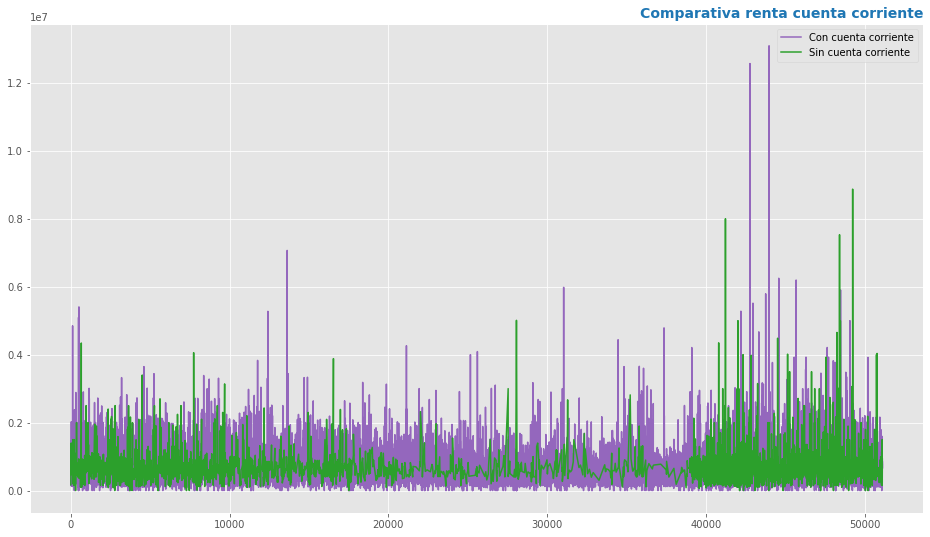

In [ ]:
# morado, renta de personas con cuenta corriente
# verde, renta de personas sin cuenta corriente

dft_fil = dft_nei[dft_nei['Indicador_cuenta'] > 0]
dft_fil2 = dft_nei[dft_nei['Indicador_cuenta'] < 1]

fig, ax = plt.subplots()
ax.plot(dft_fil.Renta, color = 'tab:purple', label = 'Con cuenta corriente')
ax.plot(dft_fil2.Renta, color = 'tab:green', label = 'Sin cuenta corriente')
ax.legend()
ax.set_title('Comparativa renta cuenta corriente', loc = "right", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()


Al terminar el Dataframe con el cual vamos a trabajar decidimos hacer un gráfico para verificar las diferencias de renta entre las personas que tienen cuenta corriente en el banco con las que no tienen.

**No** da un resultado en el que a simple vista se puede observar que las personas con cuenta corriente tienen más rentar que una persona que no la tiene.

Matriz de correlación

In [ ]:
dft_cor = dft_nei.corr()
dft_cor.style.background_gradient(cmap = 'YlOrRd')

,Edad,Renta,Indicador_cuenta,subsegmento,PagoNac_T01,PagoNac_T02,PagoNac_T03,PagoNac_T04,PagoNac_T05,Hipotecario
Edad,1.000000,0.126298,-0.244444,-0.519442,0.102946,0.112408,0.104298,0.104563,0.117788,0.050220
Renta,0.126298,1.000000,-0.037481,-0.010498,0.104477,0.084473,0.095673,0.091230,0.087567,0.209328
Indicador_cuenta,-0.244444,-0.037481,1.000000,0.160693,-0.034953,-0.042607,-0.029485,-0.040772,-0.039419,0.097521
subsegmento,-0.519442,-0.010498,0.160693,1.000000,-0.074260,-0.078433,-0.067263,-0.076826,-0.076130,-0.091344
PagoNac_T01,0.102946,0.104477,-0.034953,-0.074260,1.000000,0.205954,0.180640,0.153157,0.159302,0.044051
PagoNac_T02,0.112408,0.084473,-0.042607,-0.078433,0.205954,1.000000,0.201013,0.207272,0.194997,0.034836
PagoNac_T03,0.104298,0.095673,-0.029485,-0.067263,0.180640,0.201013,1.000000,0.166231,0.176170,0.043474
PagoNac_T04,0.104563,0.091230,-0.040772,-0.076826,0.153157,0.207272,0.166231,1.000000,0.186083,0.038618
PagoNac_T05,0.117788,0.087567,-0.039419,-0.076130,0.159302,0.194997,0.176170,0.186083,1.000000,0.041694
Hipotecario,0.050220,0.209328,0.097521,-0.091344,0.044051,0.034836,0.043474,0.038618,0.041694,1.000000


Training Clasificacion

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from collections import Counter
X = np.array(dft_nei.drop(['Hipotecario'],1))
y = np.array(dft_nei['Hipotecario'])
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


#Training Regresion

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array(dft_nei.drop(['Renta'],1))
y = np.array(dft_nei['Renta'])
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


#Modeling Clasificacion

Arbol de decisiones

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

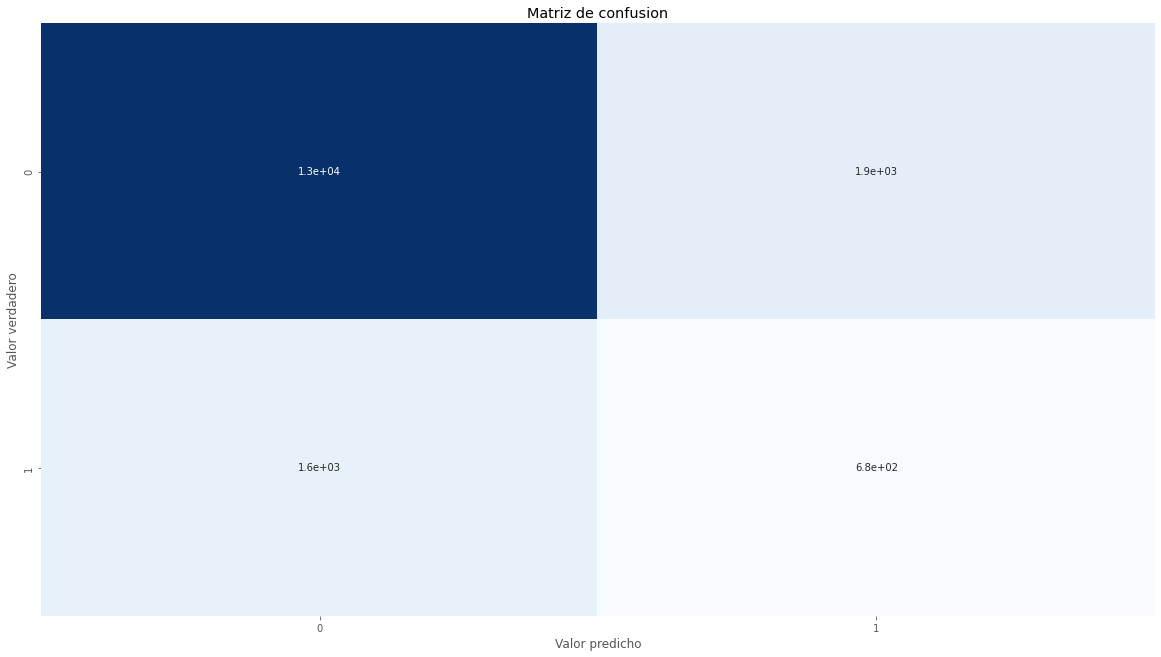

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matriz)
sb.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de confusion"), plt.tight_layout()
plt.ylabel("Valor verdadero"), plt.xlabel("Valor predicho")
plt.show()

In [ ]:
print('Exactitud: %.2f ' % accuracy_score(y_test, y_pred))
print('Recall: %.2f ' % recall_score(y_test, y_pred))

Exactitud: 0.79 
Recall: 0.29 


Elegimos este modelo, ya que este posee una estructura similar a un diagrama de flujo en la que el nodo interno tiene una característica o atributo, la rama representa una regla de decisión y cada hoja representa un resultado

Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


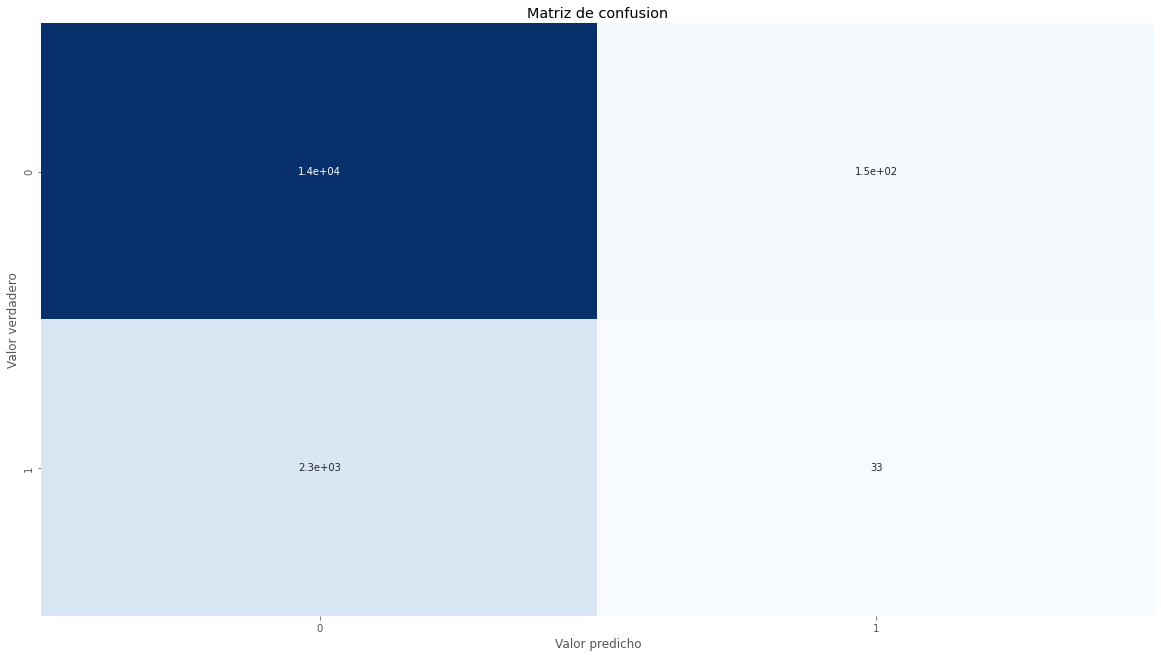

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matriz)
sb.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de confusion"), plt.tight_layout()
plt.ylabel("Valor verdadero"), plt.xlabel("Valor predicho")
plt.show()

In [ ]:
print('Exactitud: %.2f ' % accuracy_score(y_test, y_pred))
print('Recall: %.2f ' % recall_score(y_test, y_pred))

Exactitud: 0.86 
Recall: 0.01 


Escogimos este modelo, ya que es una técnica de optimización la cual se puede utilizar con la mayoría de los algoritmos de aprendizaje, este mide el grado de cambio de una variable en respuesta a los cambios de otra variable, este modelo comienza a partir de un valor inicial el cual se ejecuta iterativamente para encontrar los valores óptimos de los parámetros para encontrar el valor mínimo posible de la función dada.

También está vinculado a una probabilidad aleatoria, por lo cual algunas de las muestras que se seleccionan al azar en lugar de todo el conjunto de los datos, este escoge un número total de muestras, el cual se utiliza para calcular el gradiente.

Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

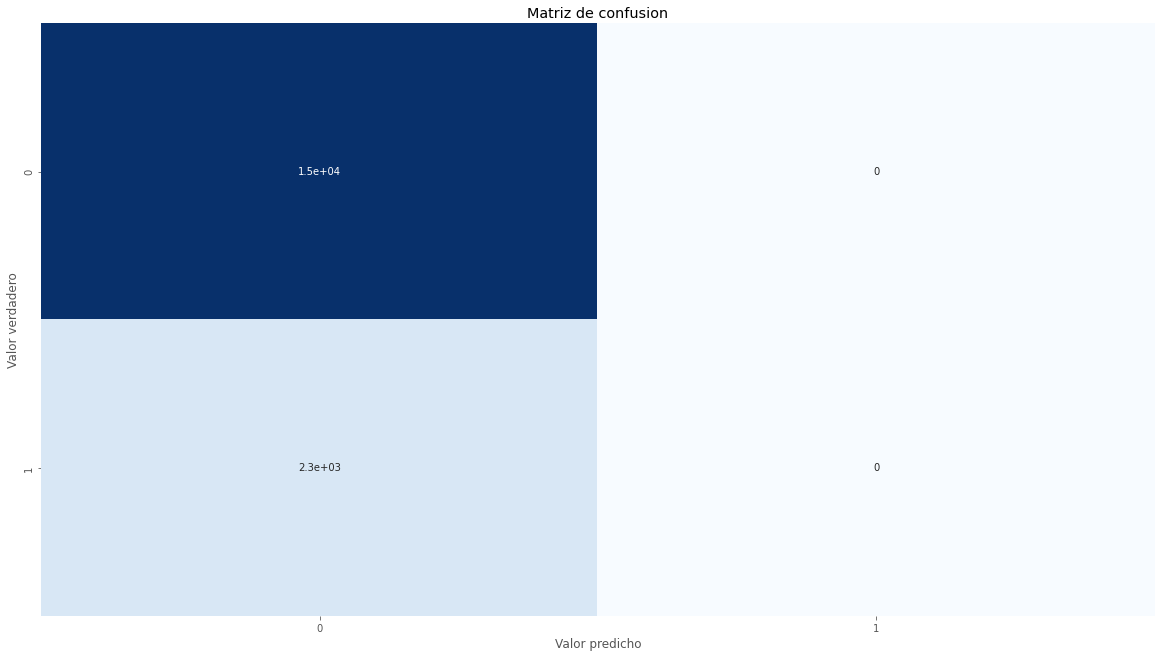

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matriz)
sb.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de confusion"), plt.tight_layout()
plt.ylabel("Valor verdadero"), plt.xlabel("Valor predicho")
plt.show()

In [ ]:
print('Exactitud: %.2f ' % accuracy_score(y_test, y_pred))
print('Recall: %.2f ' % recall_score(y_test, y_pred))

Exactitud: 0.86 
Recall: 0.00 


Elegimos este modelo, ya que este es un algoritmo no paramétrico, es decir que este no hace ninguna suposición sobre los datos subyacentes o su distribución, este es uno de los algoritmos más simples y muy utilizado

#Modeling Regresion

Bayesian Ridge Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,max_error
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)

In [ ]:
reg.score(X_train,y_train)

0.022935193988598557

In [ ]:
print('Max error: %.2f ' % max_error(y_test, y_pred))
print('R2: %.2f ' % r2_score(y_test, y_pred))
print('Error absoluto medio: %.2f' % mean_absolute_error(y_test, y_pred))
print('Error medio cuadratico: %.2f' % mean_squared_error(y_test, y_pred))

Max error: 6300181.56 
R2: 0.03 
Error absoluto medio: 223482.95
Error medio cuadratico: 120727726615.86


Escogimos implementar este modelo, ya que este nos ayuda en los datos que están mal distribuidos, porque este nos arroja el resultado a través de una distribución de probabilidad, en comparación con los modelos regulares que el resultado se obtiene de un valor único

Lasso

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_train,y_train)

0.07720547628870567

In [ ]:
print('Max error: %.2f ' % max_error(y_test, y_pred))
print('R2: %.2f ' % r2_score(y_test, y_pred))
print('Error absoluto medio: %.2f' % mean_absolute_error(y_test, y_pred))
print('Error medio cuadratico: %.2f' % mean_squared_error(y_test, y_pred))

Max error: 6375740.50 
R2: 0.09 
Error absoluto medio: 213527.20
Error medio cuadratico: 113321355487.39


Escogimos este modelo, ya que este puede eliminar completamente la variable al reducir su valor de coeficiente a 0, este modelo agrega el término de penalización de regularización a la función perdida, lo cual provoca que como ya antes mencionado el coeficiente llegue a 0 lo que elimina efectivamente la variable independiente por completo

Arbol de decisiones

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train,y_train)

0.9933730541642413

In [ ]:
print('Max error: %.2f ' % max_error(y_test, y_pred))
print('R2: %.2f ' % r2_score(y_test, y_pred))
print('Error absoluto medio: %.2f' % mean_absolute_error(y_test, y_pred))
print('Error medio cuadratico: %.2f' % mean_squared_error(y_test, y_pred))

Max error: 12585325.00 
R2: -0.75 
Error absoluto medio: 274939.64
Error medio cuadratico: 217771216354.11


 Elegimos  modelo ya que este observa las características de un objeto y entrena un modelo en la estructura del árbol para poder predecir datos a futuro

#No supervisado

In [ ]:
print(dft_nei.groupby('Edad').size())

Edad
9        1
19       9
20      58
21     212
22     638
      ... 
93       2
94       1
95       1
97       1
104      1
Length: 79, dtype: int64


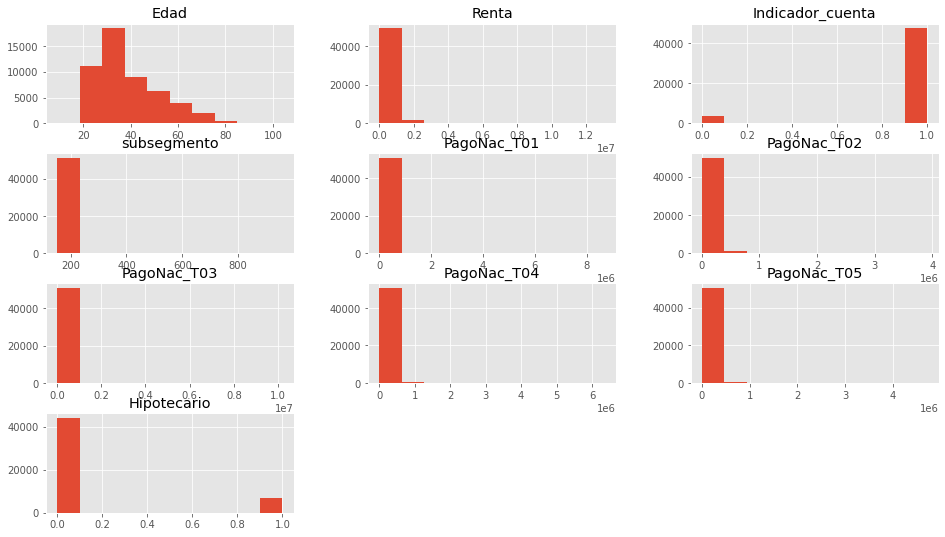

In [ ]:
dft_nei.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


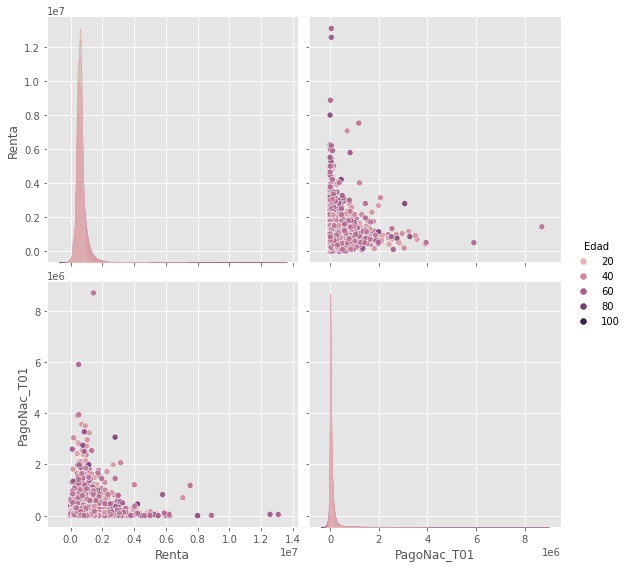

In [ ]:
sb.pairplot(dft_nei.dropna(), hue='Edad',size=4,vars=["Renta","PagoNac_T01"],kind='scatter')

In [ ]:
X = np.array(dft_nei[["Renta"]])
y = np.array(dft_nei['Edad'])
X.shape

(51124, 1)

Text(0, 0.5, 'Segunda dimensión')

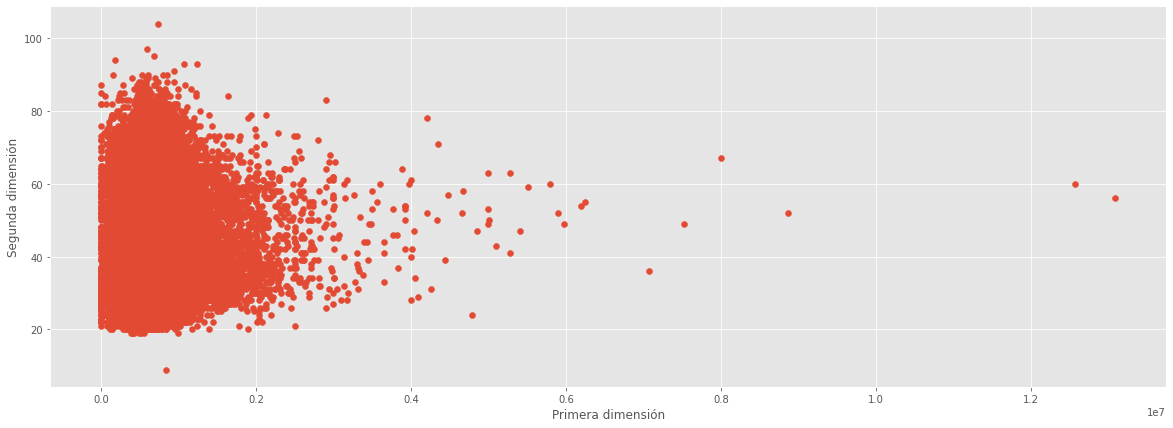

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# dimensiones
dft_nei.to_numpy()

dft_nei['Renta']
dft_nei['Edad']

# Hacemos un scatter plot de cada uno de los datos de las 2 primeras dimensiones
ax.scatter(dft_nei['Renta'], dft_nei['Edad'])

# Por cada dato escribimos a qué instancia corresponde


ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')

In [ ]:
# Creación del modelo KMeans con k = 40
kmeans = KMeans(n_clusters=5)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(dft_nei)

KMeans(n_clusters=5)

In [ ]:
np.unique(kmeans.labels_[:100], return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([37, 34,  2,  8, 19]))

In [ ]:
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_

# Muestro las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)

Shape de los centroids: (5, 10)


Text(0, 0.5, 'Renta')

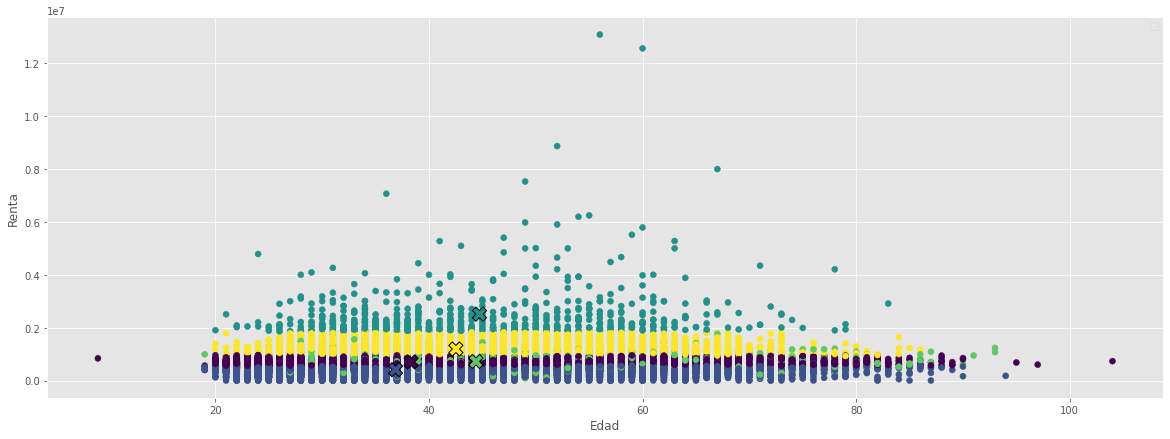

In [ ]:
# Este bloque es similar al anterior pero agregando color a cada sample en el scatter plot según la etiqueta asignada

fig, ax = plt.subplots(figsize = (20, 7))


# Hacemos un scatter plot de cada uno de los datos
ax.scatter(dft_nei["Edad"], dft_nei["Renta"], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()
ax.set_xlabel('Edad')
ax.set_ylabel('Renta')

Según el gráfico de dispersión, el modelo no supervisado dividió a los clientes de forma que cada sector es un nivel socioeconómico diferente dentro del banco.

Se puede observar que dependiendo de la renta, los clientes son acomodados en los niveles socioeconómicos, también se puede observar que la disposición se centra entre los 40 y 60 años.

Según los datos que entrega el gráfico, se puede saber que mientras más avanzada es la edad desde los 60 años la renta va disminuyendo constantemente, ya que se encuentra la tercera edad.

Clustering

In [ ]:
data_selected = dft_nei.iloc[1: 1000, 0:2].values
pd.DataFrame(data_selected)

,0,1
0,46,143640
1,45,929106
2,46,172447
3,46,805250
4,47,707664
...,...,...
994,38,491317
995,31,490239
996,47,440890
997,51,504173


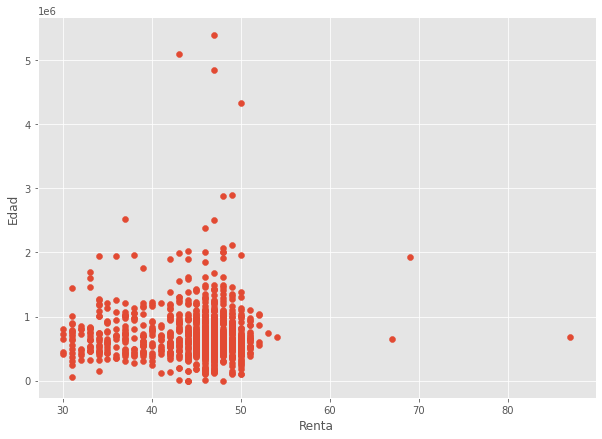

In [ ]:
# graficos los datos para ver si vemos algun patrón
plt.figure(figsize=(10, 7))
plt.scatter(data_selected[:,0], data_selected[:,1])
plt.xlabel("Renta")
plt.ylabel("Edad")
plt.show()

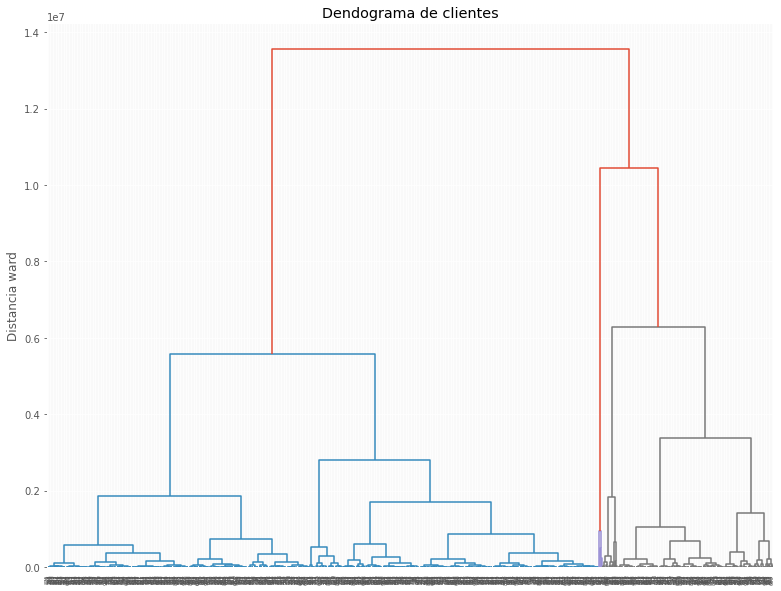

In [ ]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(13, 10))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma.
# El input de esta función es la función 'linkage' donde se especifica la distancia para utlizar en cada paso del método
dend = shc.dendrogram(shc.linkage(data_selected, method='ward'))

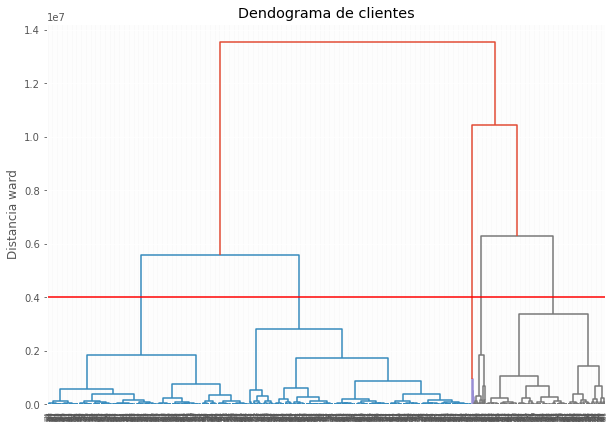

In [ ]:
# Mismo código anterior
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

dend = shc.dendrogram(shc.linkage(data_selected, method='ward'))

# la única línea de código nueva. Marca una línea roja horizontal
plt.axhline(4000000, c='r')

In [ ]:
# Importo el método de clustering jerárquico (bottom-up)
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(data_selected)  # fit_predict hace lo mismo que fit pero devuelve el vector de etiquetas de las samples

array([1, 0, 1, 4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 4, 4, 1, 1, 4, 1, 0,
       1, 4, 4, 4, 0, 0, 1, 1, 4, 4, 4, 3, 4, 1, 4, 4, 3, 4, 0, 4, 4, 1,
       1, 0, 0, 4, 0, 4, 4, 0, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 0, 4, 0, 1,
       4, 1, 1, 0, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 4, 0, 1, 1, 4, 1, 1, 4,
       1, 0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 4, 0, 4, 4, 1, 1, 1,
       1, 1, 0, 2, 4, 0, 0, 4, 0, 4, 1, 4, 1, 4, 4, 0, 0, 0, 4, 0, 0, 1,
       1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 0,
       0, 1, 4, 0, 1, 1, 4, 1, 4, 4, 1, 0, 4, 4, 0, 1, 4, 1, 1, 4, 0, 1,
       4, 4, 0, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 1, 3, 0,
       1, 4, 1, 0, 4, 4, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 4, 4, 1, 0, 4,
       1, 1, 0, 1, 4, 0, 1, 1, 0, 4, 4, 1, 1, 3, 0, 1, 1, 0, 3, 1, 1, 1,
       0, 0, 4, 1, 0, 4, 1, 0, 0, 1, 0, 4, 4, 1, 1, 0, 4, 0, 4, 0, 0, 1,
       0, 1, 1, 4, 1, 1, 1, 0, 4, 4, 4, 1, 4, 1, 1, 4, 4, 0, 0, 1, 4, 0,
       1, 0, 1, 0, 1, 3, 1, 1, 0, 4, 4, 4, 1, 4, 1,

Text(0, 0.5, 'Renta mensual')

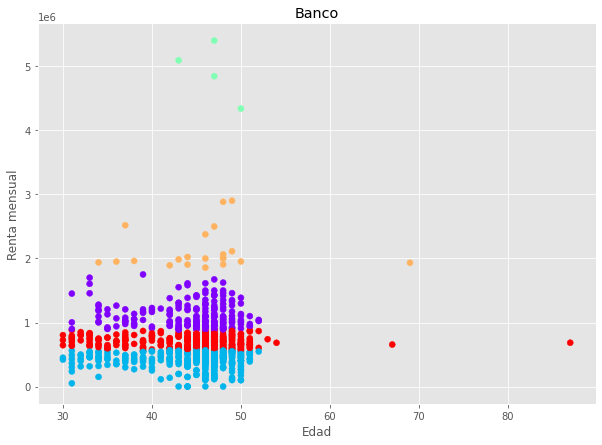

In [ ]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(10, 7))
plt.title("Banco")
plt.scatter(data_selected[:,0], data_selected[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Edad")
plt.ylabel("Renta mensual")

Puede observar que se generaron diferentes sectores económicos según la renta mensual que recibe cada persona inscrita en el banco.



Los celestes serian el grupo con menor renta registrado en el banco, siendo este lo que más se repite.



Los rojos sería el grupo con una renta superior a la mínima registrada por el banco y su distribución es pareja a los celestes.



Los morados sería el grupo intermedio de clientes registrados en el banco, su distribución varía y se puede observar que está concentrada entre los 40 y 50 años.



Los amarillos y los verdes serían los clientes con una renta bastante elevada y su distribución se centra principalmente entre los 40 y 60 años, aparte su número es bastante menor comparada con los demás.

# Conclusión

Gracias a los datos entregados pudimos aprender como se almacena la información en el banco Monopoly, que preguntas se hacen a la hora de buscar nuevos clientes, ofrecer nuevos productos y a quienes van dirigidos.



Para poder resolver el problema que nos propusimos elegimos los datos anteriormente mencionados, pero al hacer la matriz de correlación descubrimos que los datos no tenían suficiente relación para lograr los objetivos, así que intentamos seleccionar la mayoría de modelos que varían internamente la importancia de las variables, así logrando un resultado óptimo.

#Integrantes

1.-Alejandro Patricio Rivera Quezada

2.-Claudio Alfredo Flores Puentes

3.-Ignacio Andres Geldres Rivera






